<a href="https://colab.research.google.com/github/ucfilho/Raianars_Thesis/blob/main/Fig_07_ANN_parallel_coordenate_portugues_fev_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

Cloning into 'Raianars_paper_One'...
remote: Enumerating objects: 113, done.
remote: Counting objects: 100% (113/113), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 242 (delta 60), reused 0 (delta 0), pack-reused 129
Receiving objects: 100% (242/242), 653.68 KiB | 13.34 MiB/s, done.
Resolving deltas: 100% (132/132), done.
/content/Raianars_paper_One


In [2]:
import Go2Ann
import de_soma_Insight
import de_bounds_matriz
import Function
import Go2MinMax
from AvaliaX import AvaliaX
from GeraIndices import GeraIndices



In [3]:
import time
import matplotlib.pyplot as plt
import numpy as np
from random import randint
import pandas as pd
from sklearn.metrics import confusion_matrix

In [4]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

Cloning into 'ANN_read_matrix'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.
/content/Raianars_paper_One/ANN_read_matrix


In [5]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

fields = ['DIr','FRAC Its','Fo','CRo','F','CR']
fields = ['DIr','FRAC Its','Fo','CRo','F','CR']
Num=2500
Parallel_Coord=np.zeros((Num,6)) #
Max_DIr=X_max_F[0];Max_Fr=X_max_F[1]
Min_DIr=X_min_F[0];Min_Fr=X_min_F[1];Min_Fr=0
Max_F=X_max_F[2];Max_CR=X_max_F[3]
Min_F=X_min_F[2];Min_CR=X_min_F[3]

In [6]:
Parallel_F_pos=[];Parallel_CR_pos=[]
Parallel_F_neg=[];Parallel_CR_neg=[]
for i in range(Num):
  DIr=  Min_DIr+(Max_DIr-Min_DIr)*np.random.random();
  Frac=Min_Fr+(Max_Fr-Min_Fr)*np.random.random();
  Fo=Min_F+(Max_F-Min_F)*np.random.random();
  CRo=Min_CR+(Max_CR-Min_CR)*np.random.random();
  x_train=np.array([DIr,Frac,Fo,CRo])
  x_train=pd.DataFrame(x_train).T
  x_train=Go2Ann.Normatiza(x_train,X_max_F,X_min_F)
  y_calc_F=Go2Ann.ANN_ycal(syn0_F,syn1_F,x_train)
  y_calc_CR=Go2Ann.ANN_ycal(syn0_CR,syn1_CR,x_train)
  y_cod_F=Go2Ann.Classifica(y_calc_F)
  y_cod_CR=Go2Ann.Classifica(y_calc_CR)
  Parallel_Coord[i,0]=DIr;Parallel_Coord[i,1]=Frac;
  Parallel_Coord[i,2]=Fo;Parallel_Coord[i,3]=CRo;
  Parallel_Coord[i,4]=y_cod_F[0];Parallel_Coord[i,5]=y_cod_CR[0];
  if(y_cod_F[0]>0):
    Parallel_F_pos.append(Parallel_Coord[i,:])
  else:
    Parallel_F_neg.append(Parallel_Coord[i,:])
  if(y_cod_CR[0]>0):
    Parallel_CR_pos.append(Parallel_Coord[i,:])
  else:
    Parallel_CR_neg.append(Parallel_Coord[i,:])

Parallel_Coord=pd.DataFrame(Parallel_Coord,columns =fields)

Parallel_Coord['F'].replace(-1, 'Neg',inplace=True)
Parallel_Coord['F'].replace(1, 'Pos',inplace=True)
Parallel_Coord['CR'].replace(-1, 'Neg',inplace=True)
Parallel_Coord['CR'].replace(1, 'Pos',inplace=True)

Parallel_F_pos=pd.DataFrame(Parallel_F_pos,columns =fields)
Parallel_F_neg=pd.DataFrame(Parallel_F_neg,columns =fields)
Parallel_CR_pos=pd.DataFrame(Parallel_CR_pos,columns =fields)
Parallel_CR_neg=pd.DataFrame(Parallel_CR_neg,columns =fields)

Parallel_F_pos['F'].replace(1, 'Pos',inplace=True)
Parallel_F_neg['F'].replace(-1, 'Neg',inplace=True)
Parallel_CR_pos['CR'].replace(1, 'Pos',inplace=True)
Parallel_CR_neg['CR'].replace(-1, 'Neg',inplace=True)

In [7]:
print(Parallel_Coord)

           DIr  FRAC Its        Fo       CRo    F   CR
0     1.229366  0.804006  0.522736  0.778460  Pos  Pos
1     0.109097  0.588013  0.712511  0.497653  Neg  Neg
2     0.683340  0.612226  0.788686  0.841921  Neg  Neg
3     0.281108  0.802771  0.113057  0.134215  Pos  Neg
4     0.097151  0.598406  0.482091  0.753689  Neg  Pos
...        ...       ...       ...       ...  ...  ...
2495  0.065010  0.769053  0.675777  0.819691  Neg  Pos
2496  0.414996  0.399347  0.816499  0.440998  Pos  Neg
2497  0.178162  0.466540  0.791426  0.114630  Neg  Neg
2498  1.205361  0.219007  0.850536  0.368128  Neg  Neg
2499  0.469884  0.021576  0.392682  0.603127  Neg  Pos

[2500 rows x 6 columns]


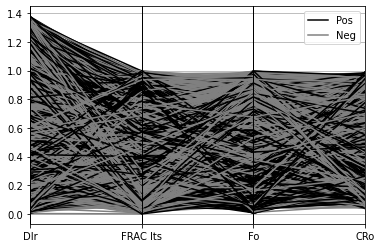

In [8]:


DF_F=Parallel_Coord[['DIr','FRAC Its','Fo','CRo','F']]

plt.figure()
pd.plotting.parallel_coordinates(DF_F, 'F', color=['black','gray'])
plt.show()

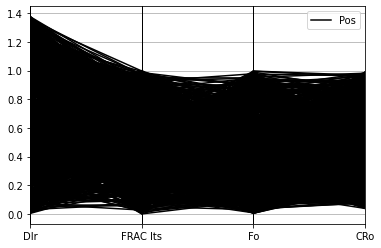

In [9]:
DF_F=Parallel_F_pos[['DIr','FRAC Its','Fo','CRo','F']]

plt.figure()
pd.plotting.parallel_coordinates(DF_F, 'F',color='black')
plt.show()

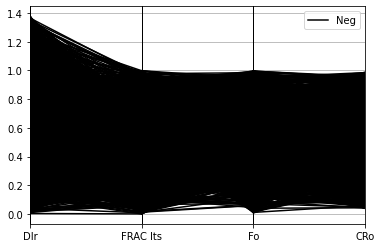

In [10]:
DF_F=Parallel_F_neg[['DIr','FRAC Its','Fo','CRo','F']]

plt.figure()
pd.plotting.parallel_coordinates(DF_F, 'F',color='black')
plt.show()

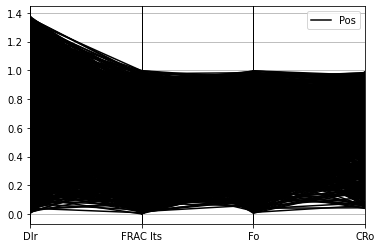

In [11]:
DF_CR=Parallel_CR_pos[['DIr','FRAC Its','Fo','CRo','CR']]

plt.figure()
pd.plotting.parallel_coordinates(DF_CR, 'CR',color='black')
plt.show()

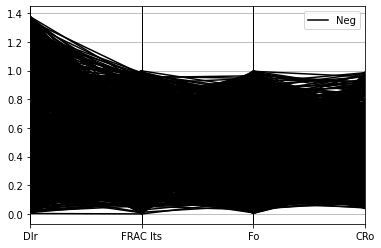

In [12]:
DF_CR=Parallel_CR_neg[['DIr','FRAC Its','Fo','CRo','CR']]

plt.figure()
pd.plotting.parallel_coordinates(DF_CR, 'CR',color='black')
plt.show()

In [13]:
Cols_name=['F 25: Fator de Mutação 25 pontos ',' ',' ',
           'F 250: Fator de Mutação 250 pontos ',' ',' ',
           'F 2500: Fator de Mutação 2500 pontos ',' ',' ',
           'CR 25: Crossover 25 pontos ',' ',' ',
           'CR 250: Crossover 250 pontos ',' ',' ',
           'CR 2500: Crossover 2500 pontos ',' ',' ',
           'Neg: Redução do Parâmetro',' ',' ',
           'Pos: Aumento do Parâmetro',' ',' ',]


Legends=['a)', 'b)','c)','d)','e)','f)','g)','h)','i)','j)','k)','l)','m)', 'n)']

In [14]:
len(Cols_name)

24

In [15]:
Parallel_Coord

,DIr,FRAC Its,Fo,CRo,F,CR
0,1.229366,0.804006,0.522736,0.778460,Pos,Pos
1,0.109097,0.588013,0.712511,0.497653,Neg,Neg
2,0.683340,0.612226,0.788686,0.841921,Neg,Neg
3,0.281108,0.802771,0.113057,0.134215,Pos,Neg
4,0.097151,0.598406,0.482091,0.753689,Neg,Pos
...,...,...,...,...,...,...
2495,0.065010,0.769053,0.675777,0.819691,Neg,Pos
2496,0.414996,0.399347,0.816499,0.440998,Pos,Neg
2497,0.178162,0.466540,0.791426,0.114630,Neg,Neg
2498,1.205361,0.219007,0.850536,0.368128,Neg,Neg


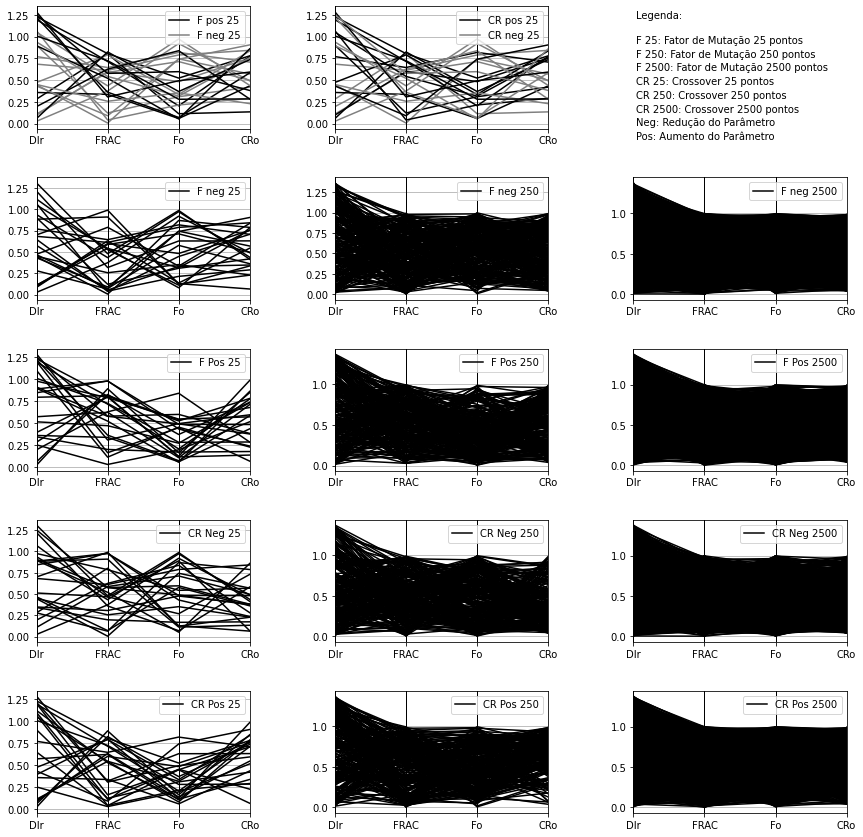

In [16]:
Ind=['DIr','FRAC','Fo','CRo','F']
Ind_CR=['DIr','FRAC','Fo','CRo','CR']

plt.subplot(5,3,1)
DF_F=Parallel_Coord[['DIr','FRAC Its','Fo','CRo','F']]
DF_F=pd.DataFrame(np.array(DF_F),columns=Ind)
DF_F=DF_F.iloc[:24,:]
DF_F['F'].replace('Pos', 'F pos 25',inplace=True)
DF_F['F'].replace('Neg', 'F neg 25',inplace=True)
pd.plotting.parallel_coordinates(DF_F, 'F', color=['black','gray'])


plt.subplot(5,3,2)
DF_F=Parallel_Coord[['DIr','FRAC Its','Fo','CRo','CR']]
DF_F=pd.DataFrame(np.array(DF_F),columns=Ind_CR)
DF_F=DF_F.iloc[:24,:]
DF_F['CR'].replace('Pos', 'CR pos 25',inplace=True)
DF_F['CR'].replace('Neg', 'CR neg 25',inplace=True)
pd.plotting.parallel_coordinates(DF_F, 'CR', color=['black','gray'])


plt.subplot(5,3,3)
h=80
dh=8
hh=80  
plt.ylim(0, hh)     # set the ylim to bottom, top
plt.xlim(0, hh)     # set the ylim to bottom, top
plt.axis('off')
plt.text(1,hh-dh,'Legenda:',fontsize=10, color = 'k')
for i in range(len(Cols_name)):
  y=h-i*3-3*dh
  plt.text(1,y,Cols_name[i],fontsize=10, color = 'k')

plt.subplot(5,3,4)
DF_F=Parallel_F_neg[['DIr','FRAC Its','Fo','CRo','F']]
DF_F=pd.DataFrame(np.array(DF_F),columns=Ind)
DF_F['F'].replace('Neg', 'F neg 25',inplace=True)
DF_F=DF_F.iloc[:24,:]
pd.plotting.parallel_coordinates(DF_F, 'F',color='black')

plt.subplot(5,3,5)
DF_F=Parallel_F_neg[['DIr','FRAC Its','Fo','CRo','F']]
DF_F=pd.DataFrame(np.array(DF_F),columns=Ind)
DF_F['F'].replace('Neg', 'F neg 250',inplace=True)
DF_F=DF_F.iloc[:249,:]
pd.plotting.parallel_coordinates(DF_F, 'F',color='black')

plt.subplot(5,3,6)
DF_F=Parallel_F_neg[['DIr','FRAC Its','Fo','CRo','F']]
DF_F=pd.DataFrame(np.array(DF_F),columns=Ind)
DF_F['F'].replace('Neg', 'F neg 2500',inplace=True)
DF_F=DF_F.iloc[:2499,:]
pd.plotting.parallel_coordinates(DF_F, 'F',color='black')


plt.subplot(5,3,7)
DF_F=Parallel_F_pos[['DIr','FRAC Its','Fo','CRo','F']]
DF_F=pd.DataFrame(np.array(DF_F),columns=Ind)
DF_F['F'].replace('Pos', 'F Pos 25',inplace=True)
DF_F=DF_F.iloc[:24,:]
pd.plotting.parallel_coordinates(DF_F, 'F',color='black')

plt.subplot(5,3,8)
DF_F=Parallel_F_pos[['DIr','FRAC Its','Fo','CRo','F']]
DF_F=pd.DataFrame(np.array(DF_F),columns=Ind)
DF_F['F'].replace('Pos', 'F Pos 250',inplace=True)
DF_F=DF_F.iloc[:249,:]
pd.plotting.parallel_coordinates(DF_F, 'F',color='black')

plt.subplot(5,3,9)
DF_F=Parallel_F_pos[['DIr','FRAC Its','Fo','CRo','F']]
DF_F=pd.DataFrame(np.array(DF_F),columns=Ind)
DF_F['F'].replace('Pos', 'F Pos 2500',inplace=True)
DF_F=DF_F.iloc[:2499,:]
pd.plotting.parallel_coordinates(DF_F, 'F',color='black')



plt.subplot(5,3,10)
DF_F=Parallel_CR_neg[['DIr','FRAC Its','Fo','CRo','CR']]
DF_F=pd.DataFrame(np.array(DF_F),columns=Ind_CR)
DF_F['CR'].replace('Neg', 'CR Neg 25',inplace=True)
DF_F=DF_F.iloc[:24,:]
pd.plotting.parallel_coordinates(DF_F, 'CR',color='black')

plt.subplot(5,3,11)
DF_F=Parallel_CR_neg[['DIr','FRAC Its','Fo','CRo','CR']]
DF_F=pd.DataFrame(np.array(DF_F),columns=Ind_CR)
DF_F['CR'].replace('Neg', 'CR Neg 250',inplace=True)
DF_F=DF_F.iloc[:249,:]
pd.plotting.parallel_coordinates(DF_F, 'CR',color='black')

plt.subplot(5,3,12)
DF_F=Parallel_CR_neg[['DIr','FRAC Its','Fo','CRo','CR']]
DF_F=pd.DataFrame(np.array(DF_F),columns=Ind_CR)
DF_F['CR'].replace('Neg', 'CR Neg 2500',inplace=True)
DF_F=DF_F.iloc[:2499,:]
pd.plotting.parallel_coordinates(DF_F, 'CR',color='black')


plt.subplot(5,3,13)
DF_F=Parallel_CR_pos[['DIr','FRAC Its','Fo','CRo','CR']]
DF_F=pd.DataFrame(np.array(DF_F),columns=Ind_CR)
DF_F['CR'].replace('Pos', 'CR Pos 25',inplace=True)
DF_F=DF_F.iloc[:24,:]
pd.plotting.parallel_coordinates(DF_F, 'CR',color='black')

plt.subplot(5,3,14)
DF_F=Parallel_CR_pos[['DIr','FRAC Its','Fo','CRo','CR']]
DF_F=pd.DataFrame(np.array(DF_F),columns=Ind_CR)
DF_F['CR'].replace('Pos', 'CR Pos 250',inplace=True)
DF_F=DF_F.iloc[:249,:]
pd.plotting.parallel_coordinates(DF_F, 'CR',color='black')

plt.subplot(5,3,15)
DF_F=Parallel_CR_pos[['DIr','FRAC Its','Fo','CRo','CR']]
DF_F=pd.DataFrame(np.array(DF_F),columns=Ind_CR)
DF_F['CR'].replace('Pos', 'CR Pos 2500',inplace=True)
DF_F=DF_F.iloc[:2499,:]
pd.plotting.parallel_coordinates(DF_F, 'CR',color='black')


plt.subplots_adjust(bottom=0.2, right=2, top=3,hspace=0.4, wspace=0.4)

In [17]:
len(Cols_name)

24